### Chapter 2 - An Array of Sequences

#### Overview of Built-In Sequences

The standard library offers a rich selection of sequence types implemented in C:

- Container Sequences
  - Can hold items of different types, including nested containers.
  - Some examples: <b>list</b>, <b>tuple</b>, and <b>collections.deque</b>.
- Flat Sequences
  - Hold items of one simple type. Examples: <b>str</b>, <b>bytes</b>, and <b>array.array/b>.

Key Difference

Container sequences hold references to the objects it contains, whereas a flat sequence stores the value of its contents in its own memory space, not as distinct Python objects.

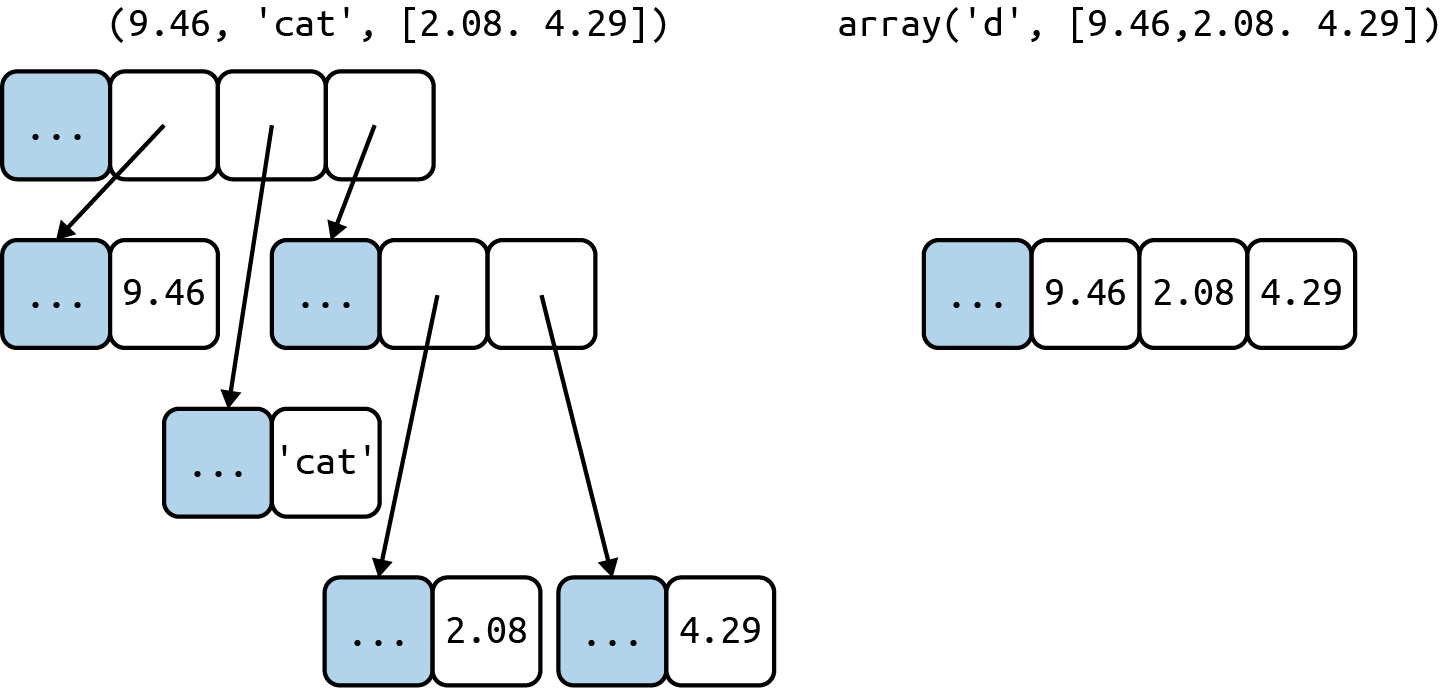

In [1]:
from pythoncarddeck import Card, FrenchDeck

In [4]:
# Example of an instance of a namedtuple
beer_card = Card('7', 'diamonds')
beer_card

Card(rank='7', suit='diamonds')

In [5]:
# Create a deck
deck = FrenchDeck()

# Length of deck (calls the __len__() method of FrenchDeck)
len(deck)

52

In [9]:
# __getitem__()
print(deck[0]) # first card
print(deck[-1]) # last card

Card(rank='2', suit='spades')
Card(rank='A', suit='hearts')


In [11]:
# Selecting a random card
# No need to create a new method -> random.choice works fine
from random import choice
for i in range(3):
    print(choice(deck))

Card(rank='10', suit='diamonds')
Card(rank='A', suit='diamonds')
Card(rank='5', suit='hearts')


In [12]:
# __getitem__ delegates to [] operator of self._cards -> deck automatically supports slicing
print(deck[:3]) # First three cards
print(deck[12::13]) # Start as position 12 (first Ace), and get every 13th card thereafter (all aces)

[Card(rank='2', suit='spades'), Card(rank='3', suit='spades'), Card(rank='4', suit='spades')]
[Card(rank='A', suit='spades'), Card(rank='A', suit='diamonds'), Card(rank='A', suit='clubs'), Card(rank='A', suit='hearts')]


In [13]:
# Implementation of __getitem__ make the deck iterable:
for card in deck:
    print(card)

Card(rank='2', suit='spades')
Card(rank='3', suit='spades')
Card(rank='4', suit='spades')
Card(rank='5', suit='spades')
Card(rank='6', suit='spades')
Card(rank='7', suit='spades')
Card(rank='8', suit='spades')
Card(rank='9', suit='spades')
Card(rank='10', suit='spades')
Card(rank='J', suit='spades')
Card(rank='Q', suit='spades')
Card(rank='K', suit='spades')
Card(rank='A', suit='spades')
Card(rank='2', suit='diamonds')
Card(rank='3', suit='diamonds')
Card(rank='4', suit='diamonds')
Card(rank='5', suit='diamonds')
Card(rank='6', suit='diamonds')
Card(rank='7', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='A', suit='diamonds')
Card(rank='2', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='8', sui

In [14]:
# Reverse
for card in reversed(deck):
    print(card)

Card(rank='A', suit='hearts')
Card(rank='K', suit='hearts')
Card(rank='Q', suit='hearts')
Card(rank='J', suit='hearts')
Card(rank='10', suit='hearts')
Card(rank='9', suit='hearts')
Card(rank='8', suit='hearts')
Card(rank='7', suit='hearts')
Card(rank='6', suit='hearts')
Card(rank='5', suit='hearts')
Card(rank='4', suit='hearts')
Card(rank='3', suit='hearts')
Card(rank='2', suit='hearts')
Card(rank='A', suit='clubs')
Card(rank='K', suit='clubs')
Card(rank='Q', suit='clubs')
Card(rank='J', suit='clubs')
Card(rank='10', suit='clubs')
Card(rank='9', suit='clubs')
Card(rank='8', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='2', suit='clubs')
Card(rank='A', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(r

In [17]:
# Since FrenchDeck hasn't implemented a __contains__ method, the 'in' operator does a sequential scan:
print(Card('Q', 'hearts') in deck)
print(Card('7', 'beasts') in deck)

True
False


In [29]:
# Ranking
suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)
print(f"Suit values: {suit_values}")

def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    return rank_value * len(suit_values) + suit_values[card.suit]

for card in sorted(deck, key=spades_high):
    print(card)

Suit values: {'spades': 3, 'hearts': 2, 'diamonds': 1, 'clubs': 0}
Card(rank='2', suit='clubs')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='clubs')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='clubs')
Card(rank='4', suit='diamonds')
Card(rank='4', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='5', suit='clubs')
Card(rank='5', suit='diamonds')
Card(rank='5', suit='hearts')
Card(rank='5', suit='spades')
Card(rank='6', suit='clubs')
Card(rank='6', suit='diamonds')
Card(rank='6', suit='hearts')
Card(rank='6', suit='spades')
Card(rank='7', suit='clubs')
Card(rank='7', suit='diamonds')
Card(rank='7', suit='hearts')
Card(rank='7', suit='spades')
Card(rank='8', suit='clubs')
Card(rank='8', suit='diamonds')
Card(rank='8', suit='hearts')
Card(rank='8', suit='spades')
Card(rank='9', suit='clubs')
Card(rank='9', suit='diamonds')
Card(rank='9', suit='hear

In [31]:
c = Card('3','diamonds')
FrenchDeck.ranks.index(c.rank)

1

#### How special methods are used

The following three approaches achieve the same result - iterate through each element in a list and print the result:

Same:
```python
l = [1,2,3]

for i in l:
    print(i)
for i in iter(l)
    print(i)
for i in l.__iter__()
    print(i)
```

In [45]:
l = [1,2,3]

for i in l:
    print(i)

for i in iter(l):
    print(i)

for i in l.__iter__():
    print(i)

1
2
3
1
2
3
1
2
3


- Avoid using direct calls to special methods, unless doing a lot of metaprogramming.
- Special methods should be implemented a lot more than be called explicitly.
- Calling the built-in function (len, iter, str) is better.
- For built-in types, calling the built-in functions is faster than special method calls.

#### Emulating Numeric Types

In [47]:
from vector2d import Vector

In [53]:
v1 = Vector(2, 4)
v2 = Vector(2, 1)
v1 + v2 # Returns a new vector as we have implemented this in the __add__ method of the Vector class.

Vector(4, 5)

In [54]:
v = Vector(3, 4)
abs(v) # Returns the hypothenuse of the vector. We defined this is the __abs__ method.

5.0

In [55]:
v * 3 # Returns the vector of each axis multiplied by a scalar value. We implemented this in __mul__.

Vector(9, 12)

#### String representation

- <p><b>repr</b> calls the special method __repr__, which returns a string representation of the object.</p>
- <p>We have also implemented <b>!r</b> in the string formatting, which returns an unambiguous representation of <b>self.x</b> and <b>self.y</b></p>
- <p>The goal is to be able to recreate the object from the output string.</p>
- <p>As such, without <b>!r</b>, in a case where the argument to a constructor are srtings (for example), then <b>'Object(john, brown)'</b> would not instantiate the object, but <b>"Object('john', 'brown')"</b> would. To achieve the latter, use <b>!r</b> in string formatting.</p>

In [56]:
repr(v) # 

'Vector(3, 4)'

If one has to choose between implementing \_\_str\_\_ and \_\_repr\_\_, choose \_\_repr\_\_, since in the absense of \_\_str\_\_, the implementation inherited from the <b>object<\b> class calls \_\_repr\_\_ as a fallback.

#### Boolean Value of a Custom Type

User defined objects are truthy, unless either __bool__ or __len__ is implemented. bool(x) calls x.__bool__ and uses the result. If __bool__ is not implemented, Python falls back on __len__ and if that returns 0, bool returns False. Otherwise bool returns True.

In [73]:
class TrueClass():
    pass

class FalseBoolClass():
    def __bool__(self):
        return False

class FalseLengthClass():
    def __len__(self):
        return 0

class TrueBoolClass():
    def __bool__(self):
        return True

class TrueLengthClass():
    def __len__(self):
        return 20

class TrueLengthFalseBoolClass():
    def __bool__(self):
        return False
    
    def __len__(self):
        return 20

class TrueLengthTrueBoolClass():
    def __bool__(self):
        return True
    
    def __len__(self):
        return 20

tc = TrueClass()
fbc = FalseBoolClass()
flc = FalseLengthClass()
tbc = TrueBoolClass()
tlc = TrueLengthClass()
tlfbc = TrueLengthFalseBoolClass()
tltbc = TrueLengthTrueBoolClass()


print(f"__bool__ not implemented, __len__ not implemented: {bool(tc)}")
print(f"__bool__ returns False, __len__ not implemented: {bool(fbc)}")
print(f"__bool__ not implemented, __len__ returns 0: {bool(flc)}")
print(f"__bool__ returns True, __len__ not implemented: {bool(tbc)}")
print(f"__bool__ not implemented, __len__ returns 20: {bool(tlc)}")
print(f"__bool__ returns False, __len__ returns 20: {bool(tlfbc)}")
print(f"__bool__ returns True, __len__ returns 20: {bool(tltbc)}")

__bool__ not implemented, __len__ not implemented: True
__bool__ returns False, __len__ not implemented: False
__bool__ not implemented, __len__ returns 0: False
__bool__ returns True, __len__ not implemented: True
__bool__ not implemented, __len__ returns 20: True
__bool__ returns False, __len__ returns 20: False
__bool__ returns True, __len__ returns 20: True


#### Collection API
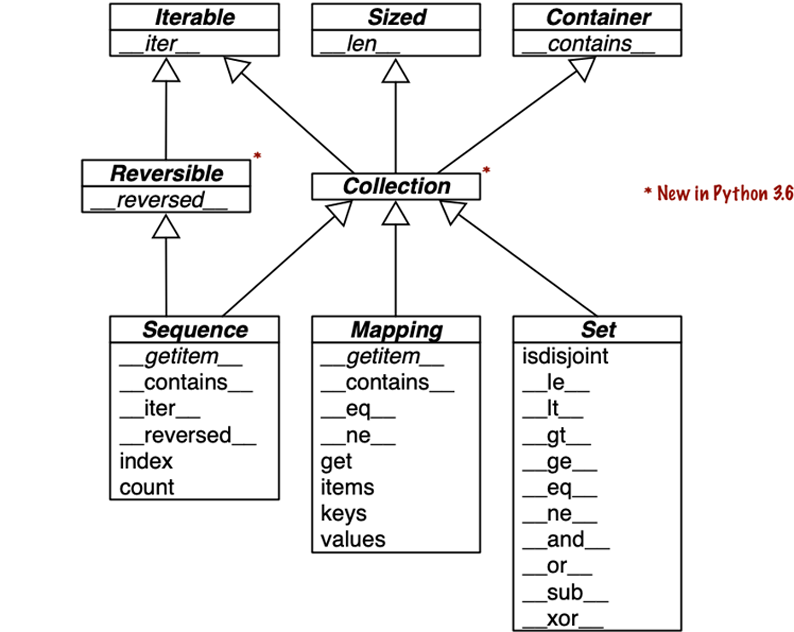

In [ ]:
# Implement a custom iterable class
# Need to implement the special method __iter__

##### Implement Sized Interface

In [77]:
# Implement a custom sized class
# Need to implement the special method __len__

class SizedClass():
    def __init__(self, num_items: int):
        self.num_items = 10

    def __len__(self):
        return self.num_items

sc_10 = SizedClass(10)
print(f"SizedClass with __len__ implementation. Length: {len(sc_10)}")

SizedClass with __len__ implementation. Length: 10


##### Implement Container Interface

In [79]:
# Implement a custom container class
# Need to implement the special method __contains__

class ContainerClass():
    def __init__(self, items: list):
        self.items = items

    def __contains__(self, item):
        return item in self.items

cc = ContainerClass(["New York", "Tokyo", "Madrid"])
print(f"ContainerClass with __contains__ implementation. Contains 'Tokyo': {'Tokyo' in cc}")

ContainerClass with __contains__ implementation. Contains 'Tokyo': True


#### Specializations of Collection

Three crucial specializations of Collection:

<b>Sequence</b> - formalizing the interface of built-ins like <b>list</b>  and <b>str</b> <br>
<b>Mapping</b> - implemented by <b>dict</b> , <b>collections.defaultdict</b> , etc.<br>
<b>Set</b> - the interface of the <b>set</b>  and <b>frozenset</b>  built-in types

Only <b>Sequence</b> is <b>Reversible</b> , because sequences support arbitrary ordering of their contents, while mappings and sets do not.

All of the special methods in the <b>Set</b> ABC implement infix operators

#### Set

All the special methods in the Set ABC implement infix operators.

E.g. a & b computes the intersection of sets a and b

#### Overview of Special Methods

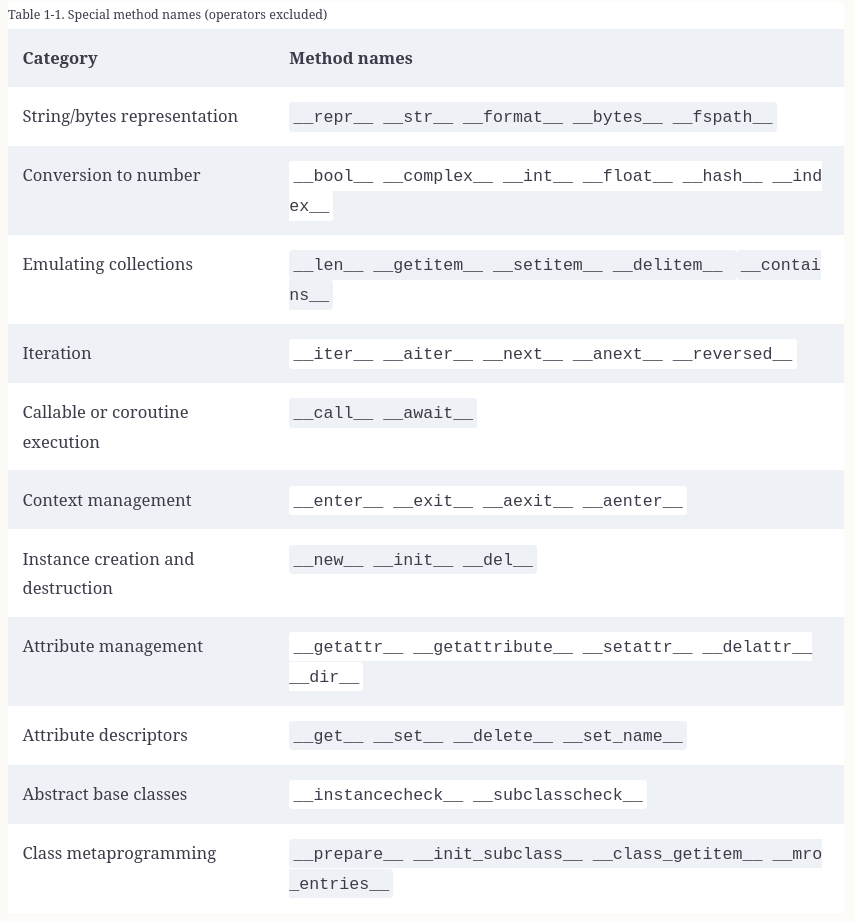

#### Infix and Numerical Operators

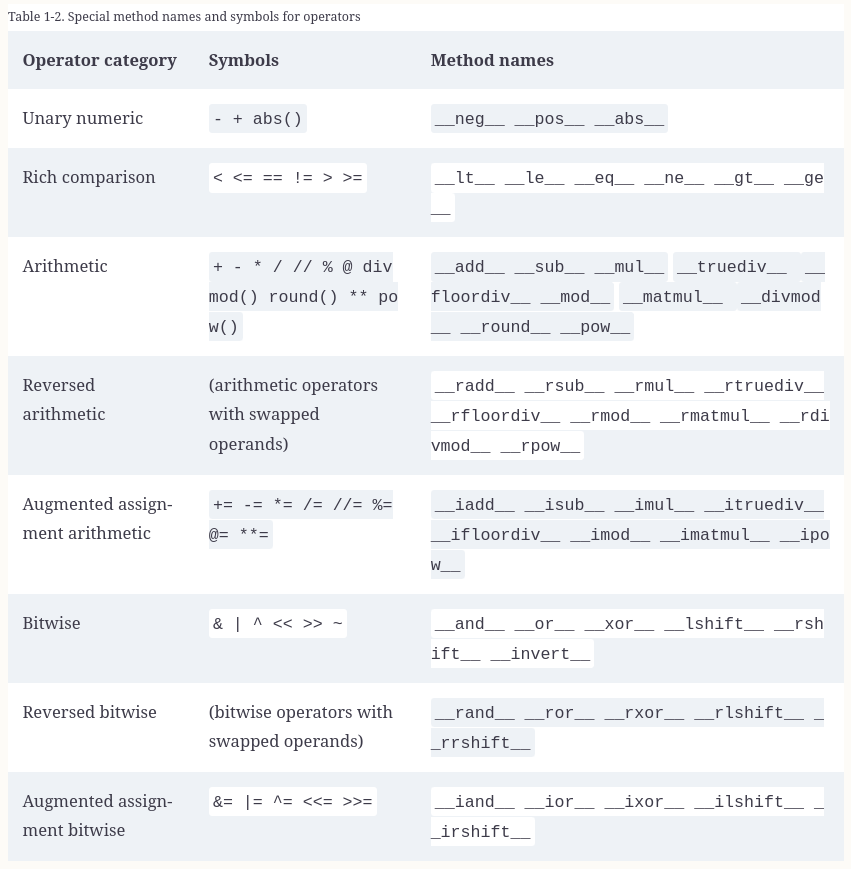

#### Why <b>len</b> is Not a Method

For built-in CPython objects like <b>str</b>, <b>list</b>, <b>memoryview</b>, etc., there is a C struct which contains a field which in turn contains the length.

In the above scenario, the length does not need to be computed. It is simply returned.